<a href="https://colab.research.google.com/github/jostan30/Laplacian-of-Gaussian-LoG-/blob/main/log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('./drive/MyDrive/Colab Notebooks/ivp3.jpg', 0)
print(image.shape)

(224, 225)


In [ ]:
def manual_convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded_image = np.pad(image, ((pad_h, pad_w)), mode='constant', constant_values=0)

    convolved = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            convolved[i, j] = np.sum(region * kernel)



    return convolved

In [ ]:
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32)
gaussian_kernel /= np.sum(gaussian_kernel)
smoothed_image = manual_convolution(image, gaussian_kernel)

[[ 39.4375  54.125   56.9375 ...  80.1875  68.6875  33.875 ]
 [ 53.75    74.0625  78.3125 ... 106.625   91.0625  44.9375]
 [ 56.4375  78.      83.     ... 106.      90.      44.5   ]
 ...
 [  9.1875  13.125   15.4375 ...  70.125   58.375   28.9375]
 [  8.4375  12.4375  14.8125 ...  68.8125  57.3125  28.375 ]
 [  6.       9.      10.8125 ...  51.0625  42.5625  21.0625]]


In [ ]:
laplacian_kernel = np.array([[0, -1, 0],
                              [-1 , 4, -1],
                              [0, -1, 0]], dtype=np.float32)


log_image1 =manual_convolution(image, laplacian_kernel)
log_image2 =manual_convolution(smoothed_image, laplacian_kernel)


[[135.  67.  72. ... 107. 199. -11.]
 [ 64.  -4.  -1. ...   2.  84. -44.]
 [ 70.  -4.   0. ...   0.  80. -42.]
 ...
 [ 11.  -5.   3. ...  -1.  46. -23.]
 [ 10.  -1.   0. ...   1.  47. -26.]
 [ 18.   7.  18. ...  68. 113.  -2.]]
[[49.875  46.0625 35.625  ... 68.875  69.625  21.875 ]
 [45.0625 32.0625 16.75   ... 46.875  54.     10.3125]
 [33.75   15.1875 -1.375  ... 19.1875 29.6875 -0.9375]
 ...
 [ 5.0625  1.4375  0.9375 ... 11.75   17.3125 -0.625 ]
 [ 6.125   4.375   4.6875 ... 28.375  31.125   6.1875]
 [ 6.5625  6.75    7.875  ... 42.1875 40.8125 13.3125]]


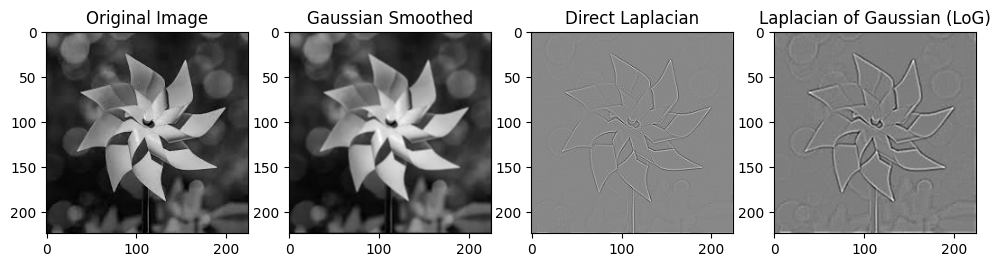

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Gaussian Smoothed')


plt.subplot(1, 4, 3)
plt.imshow(log_image1, cmap='gray')
plt.title('Direct Laplacian')

plt.subplot(1, 4, 4)
plt.imshow(log_image2, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')



plt.show()

In [ ]:

array_A = np.array([[1, 2, 3],
                    [2,2,2]])

array_B = np.array([[4, 5, 6],
                      [1,2,3]])

print(array_A * array_B)

[[ 4 10 18]
 [ 2  4  6]]
